In [2]:
import pandas as pd

# Load the final training dataset you used for the model
train_final = pd.read_csv('X_train_final.csv')


# Separate final selected features

final_features = train_final.drop(['SalePrice'], axis = 1).columns
final_features

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'Ope

In [3]:
test = pd.read_csv('test.csv')

In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
test_processed = test.copy()

In [7]:
test_processed = test_processed.fillna(0)

In [10]:
final_features = train_final.drop("SalePrice", axis=1).columns


In [14]:
#Create missing-value indicator columns
indicator_cols = [
    'LotFrontagenan',
    'MasVnrAreanan',
    'GarageYrBltnan'
]

for col in indicator_cols:
  if col not in test_processed.columns:
    test_processed[col] = 0

In [12]:
test_processed = test_processed.fillna(0)

In [15]:
#Align test data with training features

test_processed = test_processed.reindex(columns = final_features, fill_value = 0)

In [17]:
## This is the output of Feature Engineering
train_engineered = pd.read_csv('X_train.csv')

In [20]:
# Remove target and ID
engineered_features = train_engineered.drop(
    ['SalePrice','Id'],axis =1
).columns

In [21]:
# Keep ONLY engineered feature columns
test_processed = test_processed.reindex(
    columns=engineered_features, fill_value=0
)

In [22]:
#Apply FEATURE SELECTION

train_final = pd.read_csv("X_train_final.csv")
final_features = train_final.drop("SalePrice", axis=1).columns

test_processed = test_processed.reindex(
    columns=final_features, fill_value=0
)

In [24]:


# Engineered training data (after feature engineering)
train_engineered = pd.read_csv("X_train.csv")

# Feature-selected training data (after LASSO)
train_final = pd.read_csv("X_train_final.csv")

engineered_features = train_engineered.drop(
    ["SalePrice", "Id"], axis=1
).columns

final_features = train_final.drop(
    ["SalePrice"], axis=1
).columns


In [25]:
# Create empty test matrix with engineered features
test_processed = pd.DataFrame(
    0,
    index=test.index,
    columns=engineered_features
)


In [26]:
numeric_cols = test.select_dtypes(include=["int64", "float64"]).columns

for col in numeric_cols:
    if col in test_processed.columns:
        test_processed[col] = test[col]


In [27]:
test_processed = test_processed.fillna(0)


In [28]:
test_processed = test_processed[final_features]


In [29]:
import pickle

model = pickle.load(open("house_price_model.sav", "rb"))
test_predictions = model.predict(test_processed)


In [31]:
#Cross-Validation

from sklearn.model_selection import cross_val_score

import numpy as np

df = pd.read_csv("X_train_final.csv")

y = df["SalePrice"]
X = df.drop("SalePrice", axis=1)

scores = cross_val_score(
    model,
    X,
    y,
    scoring = 'neg_root_mean_squared_error',
    cv = 5
)

rmse_scores = scores

print('CV RMSE scores:', rmse_scores)
print('Mean CV RMSE:', rmse_scores.mean())
print('Std CV RMSE:',rmse_scores.std())

CV RMSE scores: [-22085.99989418 -31010.60924097 -27305.11190901 -20045.32222037
 -28245.40411826]
Mean CV RMSE: -25738.489476559007
Std CV RMSE: 4056.772294156891


In [33]:
rmse_scores = -scores

print("CV RMSE scores:", rmse_scores)
print("Mean CV RMSE:", rmse_scores.mean())
print("Std CV RMSE:", rmse_scores.std())


CV RMSE scores: [22085.99989418 31010.60924097 27305.11190901 20045.32222037
 28245.40411826]
Mean CV RMSE: 25738.489476559007
Std CV RMSE: 4056.772294156891


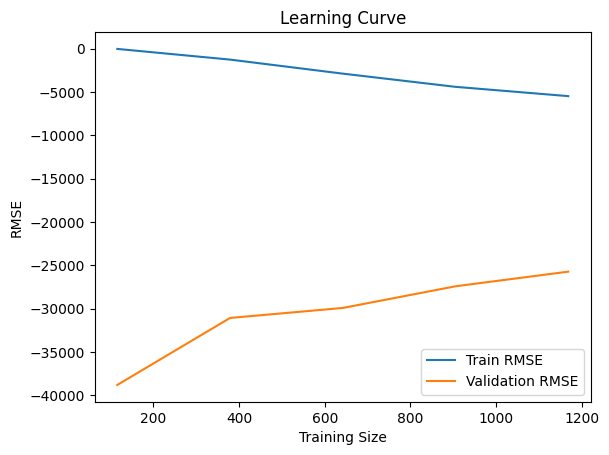

In [32]:
#Learning Curves (Advanced)

from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    model, X, y, cv = 5, scoring = 'neg_root_mean_squared_error'
)

train_rmse = train_scores.mean(axis = 1)

val_rmse = val_scores.mean(axis =1)

import matplotlib.pyplot as plt

plt.plot(train_sizes, train_rmse, label = 'Train RMSE')
plt.plot(train_sizes, val_rmse, label = 'Validation RMSE')
plt.legend()
plt.xlabel('Training Size')
plt.ylabel('RMSE')
plt.title('Learning Curve')
plt.show()